# 5 - Simulation of a 2D Ising model by the Metropolis algorithm

## Introduction
The focus of this work centers on the two-dimensional Ising model, a fundamental paradigmatic construct in statistical mechanics. This model will be used to describe the interactions among discrete spins, which can assume two states "spin up" or "spin down," within a two-dimensional lattice. A notable application of the Ising model is in understanding the behavior of spins in materials like ferromagnets.<br>
At sufficiently low temperatures, the system exhibits order, with a predominant alignment of spins. However, when the temperature is high ($T \geq T_c$), thermal fluctuations become significant, leading to the breakdown of order, resulting in a disordered arrangement of spins. <br>
The main goal of this project is to use Monte Carlo simulations to investigate this phase transition.

## 2D Ising Model Overview

The Ising Hamiltonian is described by the equation:

$$
H = -J \sum_{\langle ij \rangle} S_i S_j
$$

In this equation:
  - $S_i$ represents spins that can have values of ±1.
  -  The notation $\langle ij \rangle$ denotes nearest-neighbor interactions only.
  -  $J > 0$ represents the strength of the exchange interaction.

The system undergoes a second-order phase transition at the critical temperature $T_c$. Below $T_c$, the system magnetizes, entering the ferromagnetic or ordered state. This results in a globally ordered state due to local spin interactions. Above $T_c$, the system exists in the disordered or paramagnetic state, where there are no long-range correlations between the spins.

## Monte-Carlo simulation of 2D Ising model 

In this study, we will employ the Metropolis-Hastings algorithm to generate a set of configurations for the Ising model. Given an initial configuration, the following steps are used to generate the next configuration:

1. Flip a single spin on the lattice: $s_{i,j} \rightarrow -s_{i,j}$. This action results in a new set of spins $S' = \{s_{1,1}, s_{1,2}, \ldots, s_{i,j}, \ldots, s_{L,L}\}$, where $S' = \{s_{1,1}, s_{1,2}, \ldots, -s_{i,j}, \ldots, s_{L,L}\}$.

2. Calculate the change in energy, $\delta E = E(S') - E(S)$.

3. Accept $S'$ as the new configuration with a probability determined by:
$W(s_{i,j} \rightarrow -s_{i,j}) =
\begin{cases}
1, & \text{if }\delta E \leq 0 \\
e^{-\beta \delta E}, & \text{otherwise}
\end{cases}$

If $S'$ is rejected, the current configuration $S$ remains unchanged.
A full update involves repeating these steps $L^2$ times. The next configuration in the set used for the Monte Carlo method is obtained after one full update. 
The previous configuration is utilized as the starting configuration for the next update. 

It's important to note that the configurations generated using this algorithm are not independent since each new configuration is derived from the previous one.

## Notes on the implementation (Program)

##### Dynamic Memory Allocation for 2-D Arrays in C++
In a 2-D array, each element is a pointer to another array of data. Unfortunately, we don't have direct control over how the memory is physically allocated. It could be allocated close together or far apart from each other in memory. Consequently, fetching a row of the 2-D array or matrix may involve accessing a location that is significantly far from the current location, potentially leading to cache misses.

To optimize memory access and reduce cache misses, a common strategy is to allocate all the required memory at once, which can significantly improve performance.

In order to allocate memory for a matrix of spins, such that memory access is optimized to minimize caching time, I employed dynamic memory allocation in c++. The command for this is:

````double* spins = new double[nx * ny];````


This command dynamically allocates memory for a 2-D array and it creates a pointer (called 'spins') to an array of double values.

##### Periodic boundary conditions

In this study, I implemented periodic boundary conditions (PBC) for the spin matrix, a technique that allows us to approximate a large (potentially infinite) system by working with a smaller portion of it. <br>
The use of PBC ensures that the two-dimensional space is effectively wrapped around, creating a toroidal topology. This toroidal mapping of the space is a useful approach in simulating systems with PBC, as it emulates the behavior
of an infinite system while working with a finite representation. <br>

In practice, if $(i,j)$ is the location of a spin in the matrix, the nearest neighbours will be identified using this notation:<br> 
    ```` nn_left = ((i - 1 + nx) % nx) + j * nx; ```` <br>
	````nn_right = ((i + 1) % nx) + j * nx;````<br>
	````nn_up = i + ((j + 1) % ny) * nx;````<br>
	````nn_down = i + ((j - 1 + ny) % ny) * nx;````<br>
Notice that the mapping function from the coordinates (row, column) $(i, j)$ in the matrix to the single index identifier in the spins array of dimension $n_x \cdot n_y$ is as follows:
$$
(i, j) \longrightarrow j + i\cdot n_x
$$
It follows that the $\textbf{spin matrix}$ is a $\textbf{1-d}$ vector of lenght $nx \times ny$.

##### Random number generator

To run the Monte Carlo simulations I employed Mersenne Twister 19937 form ``random`` c++ library, a pseudorandom number generator developed in 1997. It has a period of $2^{19937} - 1$, more than sufficient for our purposes.

##### Autocorrelation time

$$
C_O(t) = \frac{1}{{t_{\text{max}} - t}} \sum_{t'= 0}^{t_{\text{max}} - t} [O(t') \cdot O(t' + t)] - \frac{1}{{t_{\text{max}} - t}} \sum_{t'= 0}^{t_{\text{max}} - t} O(t') \cdot \frac{1}{{t_{\text{max}} - t}} \sum_{t'=0}^{t_{\text{max}} - t} O(t' + t)
$$

<br>
<br>

# 5.1 - Exercise

## Simulation

By assuming $k_B = 1$ and $J = 1$ I simulated the 2D Ising model for different values of temperatures ( in particular $0.5$, $1$ and $1.5$ times the critical temperature $T_c$) and 3 different values of L (25,50 and 100).
| Parameters                        |                                 |
|-----------------------------------|---------------------------------|
| L                                 |   [25, 50, 100]                 |
| J                                 |   1                             |
| $k_BT$                            |   $ T_c$[0.5, 1, 1.5]           |
| $N_{steps}$                       |   10^7                          |
| $N_{realiz}$                      |   1                             |
| $N_{skip}$                        |   500                           |


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from scipy.optimize import curve_fit

In [2]:
#data = 25_0.5
data_25_05 = np.loadtxt("25_b.txt")
data_25_1 = np.loadtxt("25_c.txt")
data_25_15 = np.loadtxt("25_a.txt")

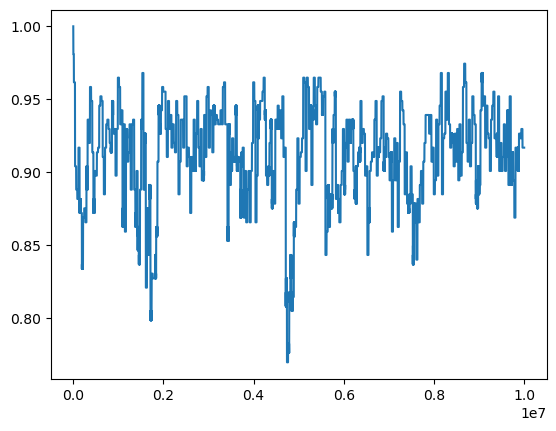

In [3]:
#data = 25_1
data_25_05 = np.loadtxt("25_b.txt")
mc_steps = data_25_1[0:,0]
energies_c = data_25_1[0:,1]
magnetizations_c = data_25_1[0:,2]
plt.plot(mc_steps,magnetizations_c)

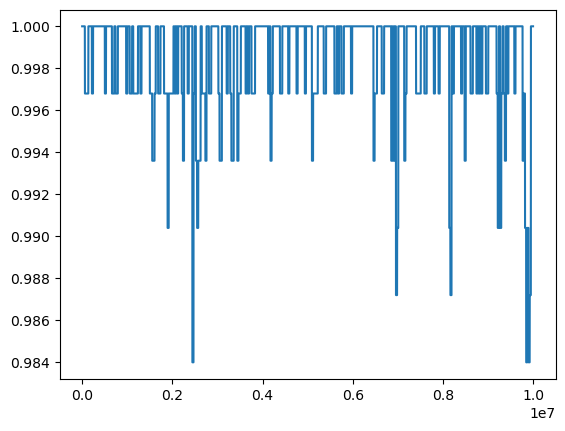

In [4]:
#data = 25_0.5
data_25_05 = np.loadtxt("25_b.txt")
mc_steps = data_25_05[0:,0]
energies = data_25_05[0:,1]
magnetizations_b = data_25_05[0:,2]
plt.plot(mc_steps,magnetizations_b)

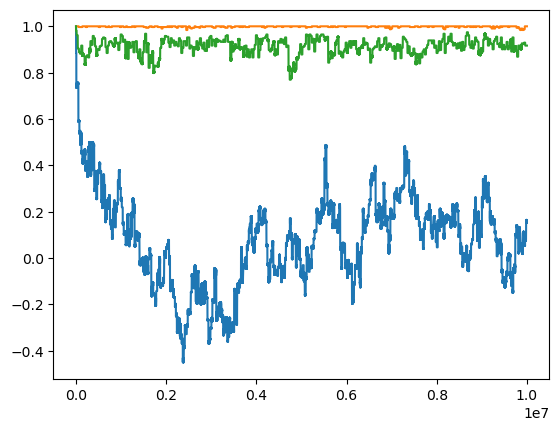

In [5]:
mc_steps = data_25_15[0:,0]
energies = data_25_15[0:,1]
magnetizations = data_25_15[0:,2]
plt.plot(mc_steps,magnetizations)
plt.plot(mc_steps,magnetizations_b)
plt.plot(mc_steps,magnetizations_c)

##### L = 25

In [6]:
data_25_05 = np.loadtxt("25_b.txt")
data_25_1 = np.loadtxt("25_c.txt")
data_25_15 = np.loadtxt("25_a.txt")

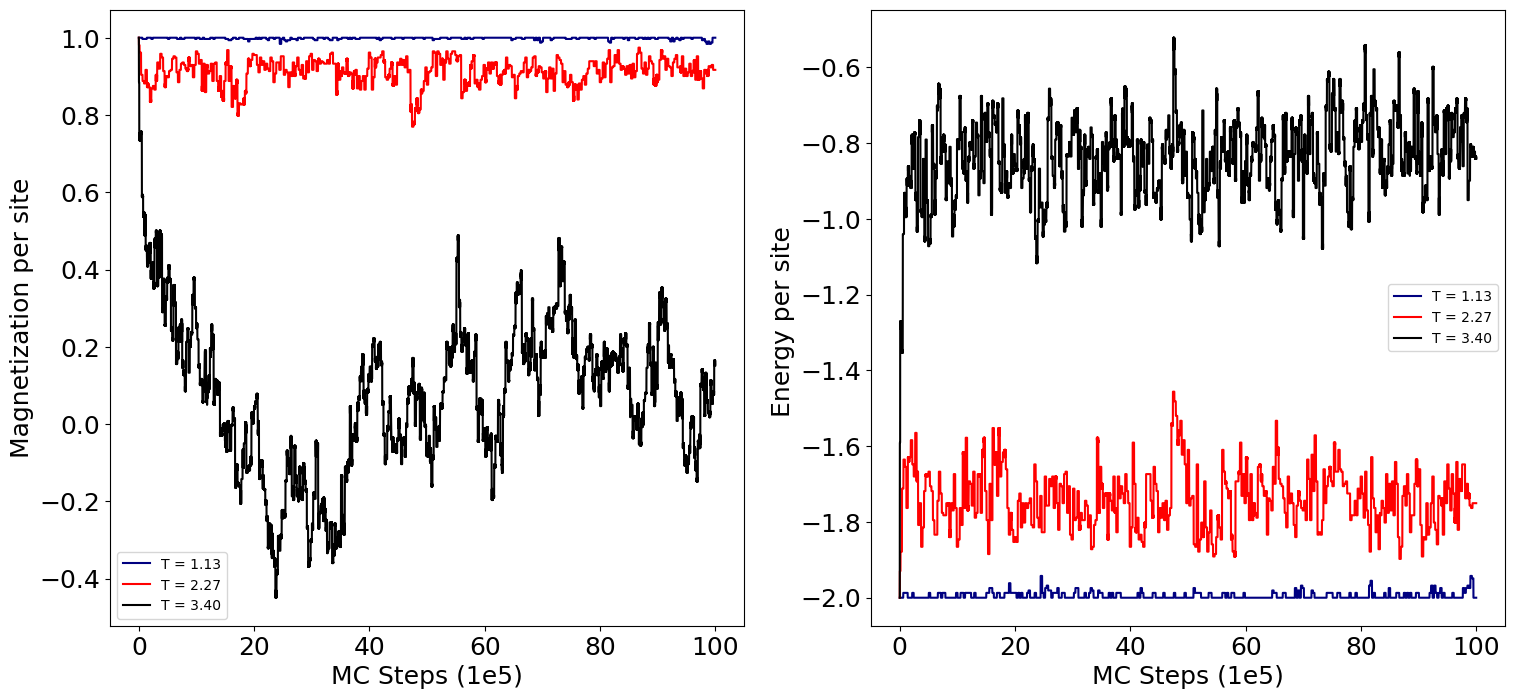

In [7]:
col_map = np.array(["navy", "red", "black"])
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_25_05,data_25_1,data_25_15]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
index_count=0
for T in temperatures:
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]

    ax1.plot(mc_steps, magnetizations, label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax1.legend(loc = 'best')
    ax2.plot(mc_steps, energies,label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax2.legend(loc = 'center right')
    ax1.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax2.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax1.set_ylabel("Magnetization per site", fontsize = 18)
    ax2.set_ylabel("Energy per site ", fontsize = 18)
    ax1.tick_params(axis="x",labelsize=18)
    ax2.tick_params(axis="x",labelsize=18)
    ax1.tick_params(axis="y",labelsize=18)
    ax2.tick_params(axis="y",labelsize=18)
    index_count+=1
plt.show()

##### L = 50

In [8]:
data_50_05 = np.loadtxt("50_b.txt")
data_50_1 = np.loadtxt("50_c.txt")
data_50_15 = np.loadtxt("50_a.txt")

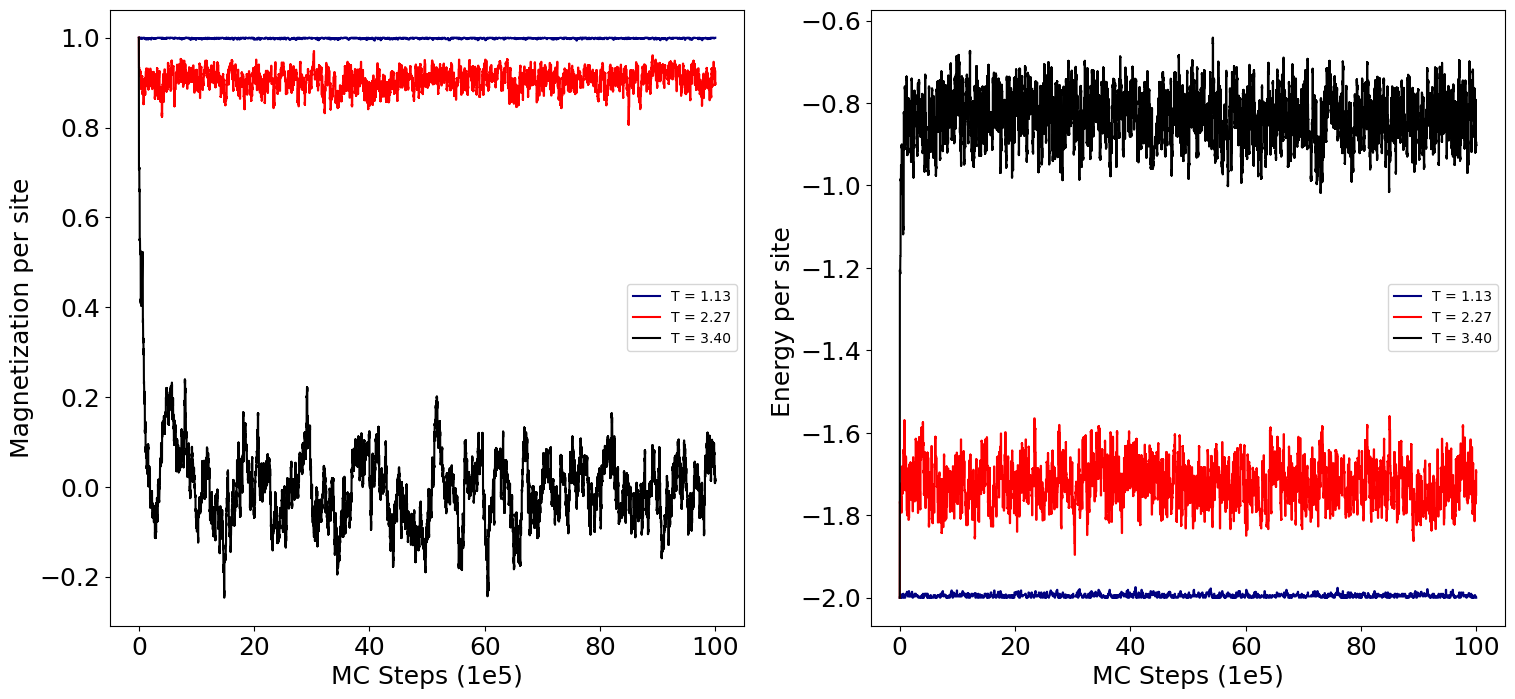

In [9]:
col_map = np.array(["navy", "red", "black"])
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_50_05,data_50_1,data_50_15]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
index_count=0
for T in temperatures:
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]

    ax1.plot(mc_steps, magnetizations, label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax1.legend(loc = 'best')
    ax2.plot(mc_steps, energies,label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax2.legend(loc = 'center right')
    ax1.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax2.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax1.set_ylabel("Magnetization per site", fontsize = 18)
    ax2.set_ylabel("Energy per site ", fontsize = 18)
    ax1.tick_params(axis="x",labelsize=18)
    ax2.tick_params(axis="x",labelsize=18)
    ax1.tick_params(axis="y",labelsize=18)
    ax2.tick_params(axis="y",labelsize=18)
    index_count+=1
plt.show()

##### L = 100

In [10]:
data_100_05 = np.loadtxt("100_b.txt")
data_100_1 = np.loadtxt("100_c.txt")
data_100_15 = np.loadtxt("100_a.txt")

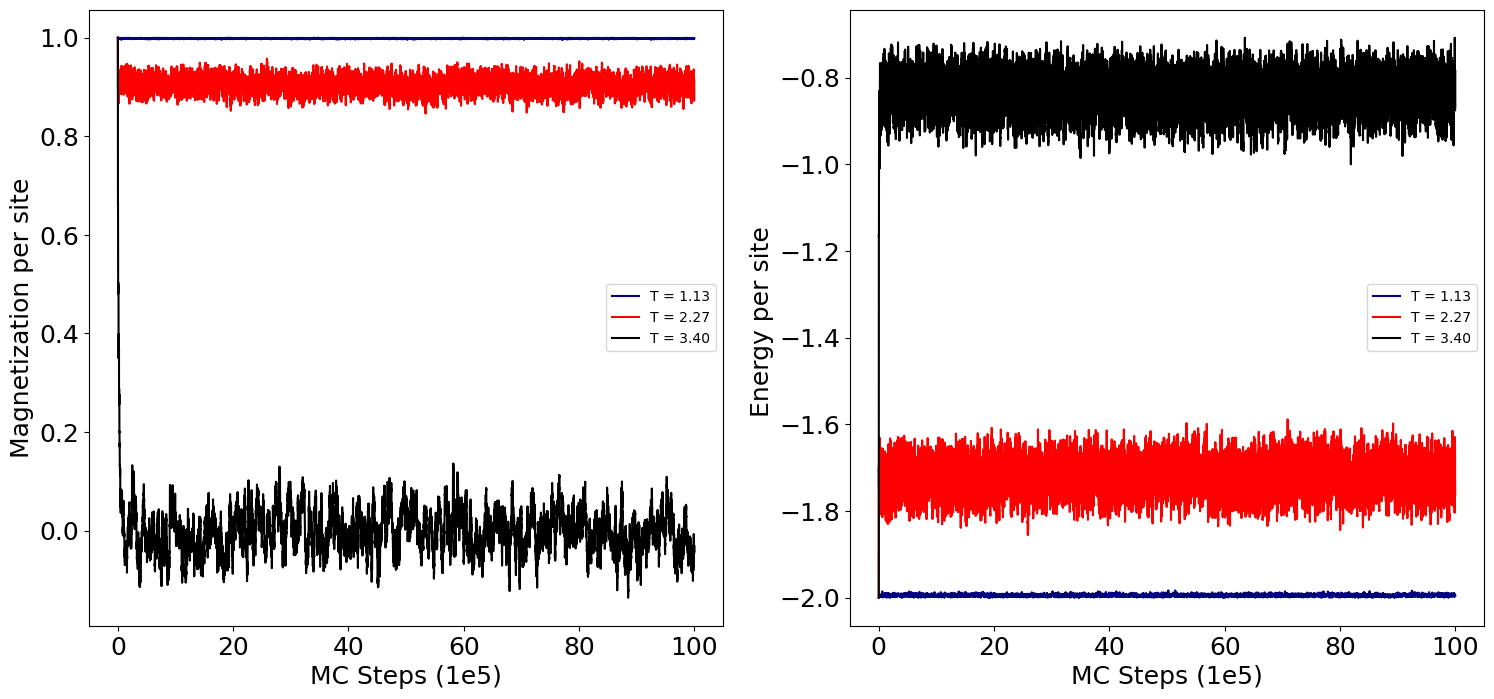

In [11]:
col_map = np.array(["navy", "red", "black"])
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_100_05,data_100_1,data_100_15]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
index_count=0
for T in temperatures:
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]

    ax1.plot(mc_steps, magnetizations, label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax1.legend(loc = 'best')
    ax2.plot(mc_steps, energies,label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax2.legend(loc = 'center right')
    ax1.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax2.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax1.set_ylabel("Magnetization per site", fontsize = 18)
    ax2.set_ylabel("Energy per site ", fontsize = 18)
    ax1.tick_params(axis="x",labelsize=18)
    ax2.tick_params(axis="x",labelsize=18)
    ax1.tick_params(axis="y",labelsize=18)
    ax2.tick_params(axis="y",labelsize=18)
    index_count+=1
plt.show()

## Equilibration time, averages and fluctuations 
After having determined the equilibrium time and disregarding the samples for $t < \tau_{eq}$ estimate the ensemble averages of the magnetisation per spin, the
energy per spin, and the corresponding fluctuations (specific heat and magnetic susceptibility).

To compute the $\tau_{eq}$, we plot the magnetisation M and the energy E along the trajectory as a function of time. By visual inspection one can see that eventually the observable will fluctuate around a constant value. At that time we can say that the MC has reached its equilibrium (stationarity). Let us consider the case $L=100$ (so the last plot above):

| Parameters                        |                                 |
|-----------------------------------|---------------------------------|
| L                                 |   100                            |
| J                                 |   1                             |
| $k_BT$                            |   $ T_c$[0.5, 1, 1.5]           |
| $N_{steps}$                       |   10^7                          |
| $N_{realiz}$                      |   1                             |
| $N_{skip}$                        |   500                           |

From visual inspection we can safely consider the chain from $\tau_{eq} = 3000 \text{ steps}$ on to estimate the specific heat and the magnetic susceptibility.

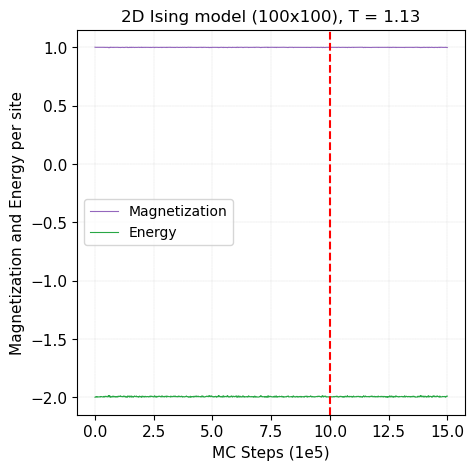

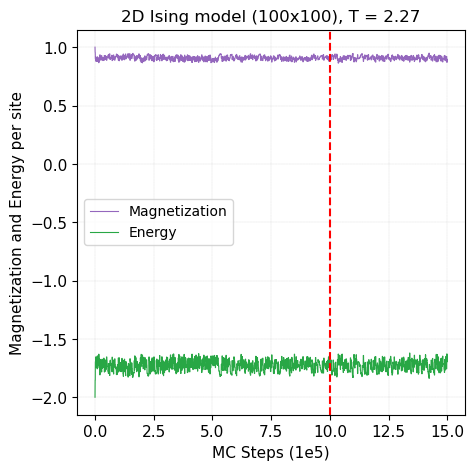

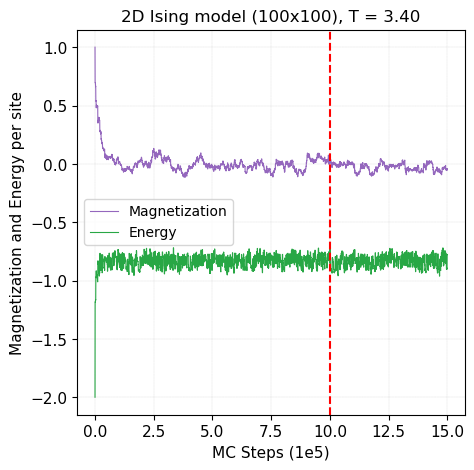

In [12]:
col_map = np.array(["navy", "red", "black"])
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_100_05,data_100_1,data_100_15]

index_count=0
for T in temperatures:
    data = data_list[index_count]
    mc_steps = data[0:3000,0]/1e5
    energies = data[0:3000,1]
    magnetizations = data[0:3000,2]
    
    plt.figure(figsize = (5, 5))
    plt.title('2D Ising model (100x100), T = {:.2f}'.format(T))
    plt.plot(mc_steps, magnetizations, label='Magnetization', c = '#9467bd', linewidth = 0.8)
    plt.plot(mc_steps, energies,label='Energy', c = '#28a745',linewidth = 0.8)
    plt.xlabel("MC Steps (1e5)", fontsize = 11)
    plt.ylabel("Magnetization and Energy per site", fontsize = 11)
    plt.tick_params(axis="x",labelsize=11)
    plt.tick_params(axis="y",labelsize=11)
    plt.legend(loc = 'best')
    plt.grid(ls = '--', c='gray', lw=0.1)
    plt.axvline(data[2000,0]/1e5, color='r', linestyle='--')
    index_count+=1
    plt.show()

In [13]:
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic

for index_count, T in enumerate(temperatures):
    data = data_list[index_count]
    mc_steps = data[3000:,0]/1e5
    energies = data[3000:,1]
    magnetizations = data[3000:,2]

    E = np.mean(energies)
    M = np.mean(magnetizations)                
    C = (np.std(energies)**2)/(T**2)
    Chi = (np.std(magnetizations)**2)/(T)
    print(f'T = {T:.3g}')   
    print(f"Magnetization per spin: {M:.4g}")  
    print(f"Energy: {E:.4g}")  
    print(f"Specific heat: {C:.4g}")  
    print(f"Magnetic susceptibility: {Chi:.4g}") 
    print("------ \n")

T = 1.13
Magnetization per spin: 0.9986
Energy: -1.995
Specific heat: 4.839e-06
Magnetic susceptibility: 3.768e-07
------ 

T = 2.27
Magnetization per spin: 0.906
Energy: -1.724
Specific heat: 0.000458
Magnetic susceptibility: 0.0001511
------ 

T = 3.4
Magnetization per spin: -0.0002321
Energy: -0.8368
Specific heat: 0.0002584
Magnetic susceptibility: 0.0004883
------ 



## 5.2 Exercise

### Integrated correlation time and critical slowing-down
Estimate the autocorrelation time of the magnetisation and the energy for the MC simulations proposed above and estimate the errors accordingly.

In general the autocorrelation function calculates the correlation of a signal/chain with a delayed copy of itself as a function of delay. When the chain reaches equilibrium, the autocorrelation $C_O(t)$ is expected to decay to zero or become very small -since the sampled configurations are very far apart to be correlated-. 
The autocorrelation function of an observable $O$ can be computed as:

$$
C_O(t)=\int dt'[O(t')-\langle O\rangle][O(t+t')-\langle O\rangle]=\int dt'[O(t')O(t+t')-\langle O\rangle^2].
$$

It is possible to show that $C_{O}(t)$ goes to zero as

$$
C_{O}(t)\sim e^{-t/\tau_{int}^{O}}
$$
 
The characteristic time $\tau_{int}^O$ is known as the integrated autocorrelation time of the observable $O.$
A very simple way to estimate $\tau_{int}^O$ is to compute the autocorrelation time $C(t)$ of the trajectory $O_t$ fit it with an exponential (or a straight line in log scale) and estimate $\tau_{int}^O$ as $2\tau$ where $\tau$ is the time at which $C(t)$ is 1/e.

In the following part, the autocorrelation function of magnetization and energy (with time lag ranging from 0 to 400) is plotted. Then the curve in log scale is fitted with a line $y=mx+q$ in order to compute the characteristic time.

| Parameters                        |                                 |
|-----------------------------------|---------------------------------|
| L                                 |   100                            |
| J                                 |   1                             |
| $k_BT$                            |   $ T_c$[0.5, 1, 1.5]           |
| $N_{steps}$                       |   10^7                          |
| $N_{realiz}$                      |   1                             |
| $N_{skip}$                        |   500                           |

In [14]:
# Temperatures and corresponding chains (L=100)
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_100_05,data_100_1,data_100_15]

# List to store the correlation func. for energy and magnetization chain
corr_M = []
corr_E = []
num_lag= 600
threshold = 0.0001

for index_count, T in enumerate(temperatures):
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]
    tmp_m = acf(magnetizations, nlags=num_lag, fft=False) # Acf magnetization
    tmp_e = acf(energies, nlags=num_lag, fft=False)       # Acf energy
    corr_M.append(tmp_m)
    corr_E.append(tmp_e)
    t_eq_m = np.argmax(tmp_m < threshold)
    t_eq_e = np.argmax(tmp_e < threshold)
    
    print(f'T = {T:.3g} \n')   
    print(f"Equilibration time for energy: {t_eq_e} MC steps")
    print(f"Equilibration time for magnetization: {t_eq_m} MC steps")
    print("------")

T = 1.13 

Equilibration time for energy: 14 MC steps
Equilibration time for magnetization: 13 MC steps
------
T = 2.27 

Equilibration time for energy: 41 MC steps
Equilibration time for magnetization: 219 MC steps
------
T = 3.4 

Equilibration time for energy: 57 MC steps
Equilibration time for magnetization: 196 MC steps
------


Text(0, 0.5, 'Acf')

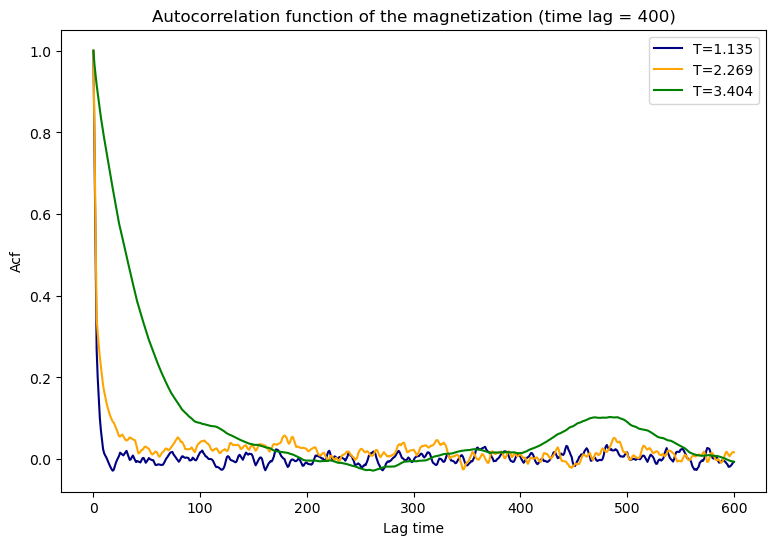

In [15]:
#--- Plot----
colors = ["navy", "orange", "green"]

plt.figure(figsize=(20,6))
ax0 = plt.subplot(1,2,1)

for i,x in enumerate(corr_M):
    ax0.plot(x, label='T='+str('%.3f'%temperatures[i]), c = colors[i])
plt.legend()
plt.title('Autocorrelation function of the magnetization (time lag = 400)')
plt.xlabel('Lag time')
plt.ylabel('Acf')

Text(0, 0.5, 'Acf')

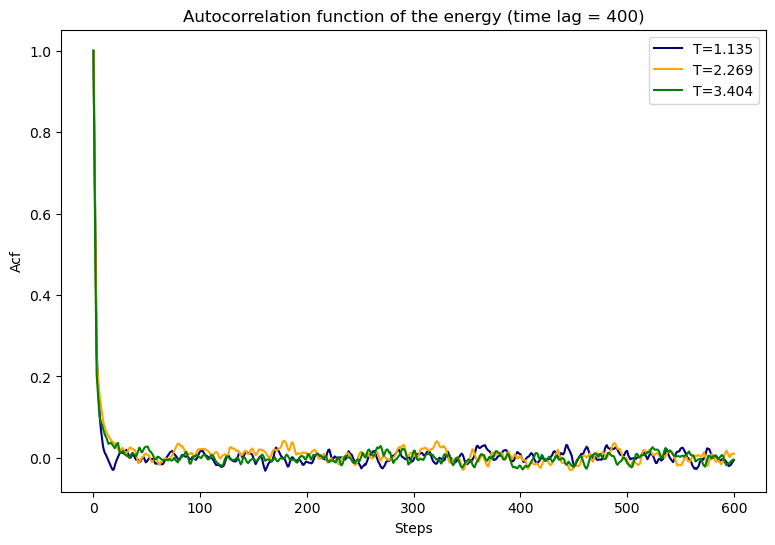

In [16]:
#--- Plot----
colors = ["navy", "orange", "green"]

plt.figure(figsize=(20,6))
ax0 = plt.subplot(1,2,1)

for i,x in enumerate(corr_E):
    ax0.plot(x, label='T='+str('%.3f'%temperatures[i]), c = colors[i])
plt.legend()
plt.title('Autocorrelation function of the energy (time lag = 400)')
plt.xlabel('Steps')
plt.ylabel('Acf')

In [17]:
def func(x, m, q):
    return m*x + q

tau_list_M=[]
parameters_M=[]
end_step = 5
lag = np.arange(0,end_step+1)
for i,temp in enumerate(corr_M):
    sol, err = curve_fit(func, lag, np.log(corr_M[i][:end_step+1]) )
    tau_list_M.append(-1/sol[0])
    parameters_M.append(sol)

In [18]:
tau_list_E=[]
parameters_E=[]
end_step = 6
lag = np.arange(0,end_step+1)
for i,temp in enumerate(corr_E):
    sol, err = curve_fit(func, lag, np.log(corr_E[i][:end_step+1]))
    tau_list_E.append(-1/sol[0])
    parameters_E.append(sol)

In [19]:
tau_list_E

[2.514279832928752, 2.9609552484977453, 2.463715028771458]

In [20]:
tau_list_M

[2.483112528703851, 3.632289519171793, 38.34607009970677]

<Figure size 1200x600 with 0 Axes>

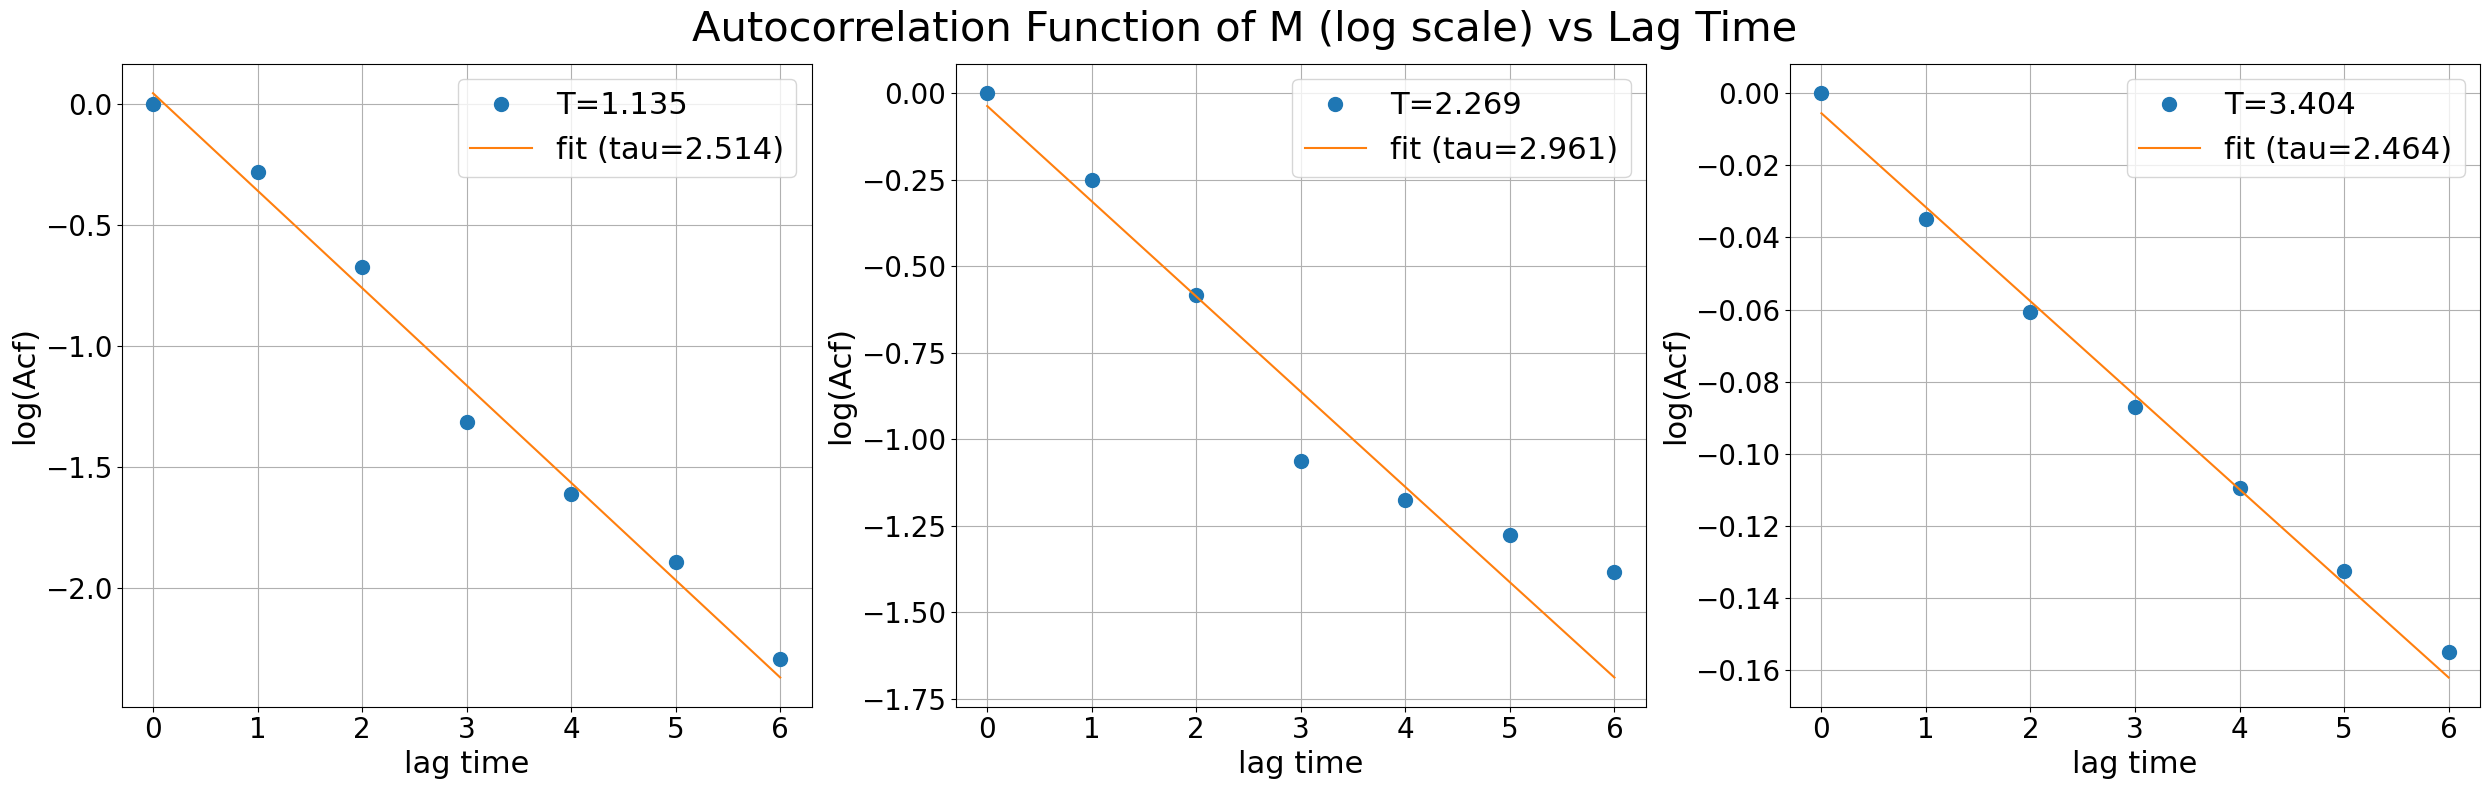

In [21]:
plt.figure(figsize=(12,6))
fig, axes = plt.subplots(1,3, figsize=(25, 8))

for i, ax in enumerate(axes):
    ax.plot(np.log(corr_M[i][:end_step+1]), 'o', markersize=10, label='T='+str('%.3f'%temperatures[i]))
    ax.plot((parameters_M[i][0])*(np.arange(0,end_step+1)) + parameters_M[i][1], '-', label='fit (tau={})'.format('%.3f'%tau_list_E[i]))
    ax.set_xlabel('lag time',fontsize=22)
    ax.set_ylabel('log(Acf)',fontsize=22)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid()
    ax.legend(fontsize=22)
plt.suptitle('Autocorrelation Function of M (log scale) vs Lag Time', fontsize=30)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

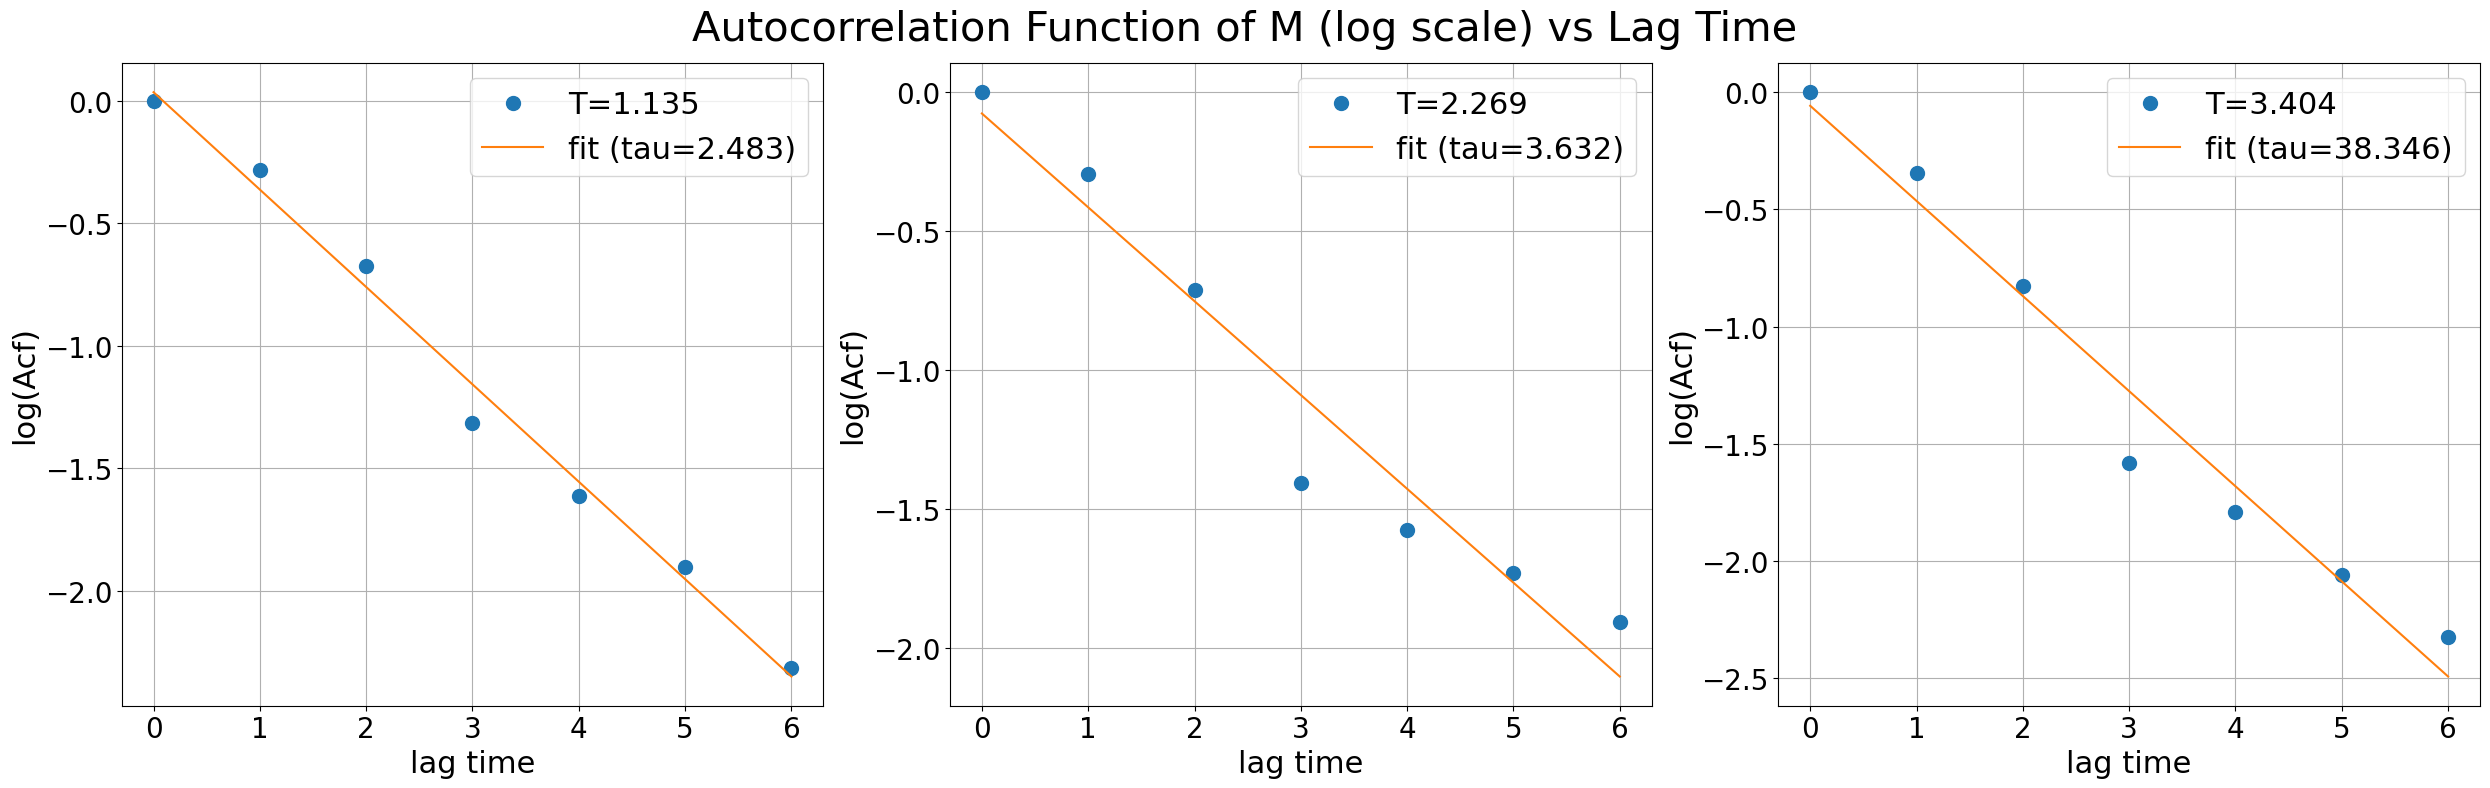

In [22]:
plt.figure(figsize=(12,6))
fig, axes = plt.subplots(1,3, figsize=(25, 8))

for i, ax in enumerate(axes):
    ax.plot(np.log(corr_E[i][:end_step+1]), 'o',markersize=10, label='T='+str('%.3f'%temperatures[i]))
    ax.plot((parameters_E[i][0])*(np.arange(0,end_step+1)) + parameters_E[i][1], '-', label='fit (tau={})'.format('%.3f'%tau_list_M[i]))
    ax.set_xlabel('lag time',fontsize=22)
    ax.set_ylabel('log(Acf)',fontsize=22)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid()
    ax.legend(fontsize=22)
plt.suptitle('Autocorrelation Function of M (log scale) vs Lag Time', fontsize=30)
plt.tight_layout()
plt.show()

Since the value of $\tau_{int}^O$ could depend largely on the chosen observable $O$, if we are interested in $many$ observa$ble$s (energy and magnetization), the correct sampling interval time will be given by
 
$$
\tau_{int}=\max_O\{\tau_{int}^O\}
$$

At this point we want to $\textbf{estimate the errors}$ on the mean of (the last $\tau_{eq}$ points of..) a given observable O. We will consider 2 methods to compute the error bars on the mean of the observables:
   - correlation time based error bars; <br>
   - batch means. <br>

##### 1) Correlation time based error bars
Ideally we should downsample the chain every $\tau^O_{int}$ but this would reduce sensibly the number of points at our disposal. Usually, one considers confgurations sampled at time intervals $\Delta t$ and estimates the error bars using the information of $\tau^O_{int}$. 

If we sample data over intervals $\Delta t<\tau_{int}^O$,it is possible to show that the correct estimate of the variance on the mean of $t_{max} - \tau_{eq}$ points of $O$ is given by:

$$S_{t_{max}}^{2}=\frac{1+2\tau/\Delta t}{(t_{max}-\tau_{eq}-1)}\sum_{t=\tau_{eq}}^{t_{max}}(O_{t}-\bar{O}_{t_{max}})^{2}.$$

In [32]:
def error_bar_corr(O, t_max, tau_eq, tau, delta_t):
    mean_O_t_max = np.mean(O) # O is fed to algorithm already sliced off
    weighted_sum = sum((O[t] - mean_O_t_max) ** 2 for t in range(tau_eq))
    denominator = (t_max - tau_eq - 1) * (1 + 2 * tau / delta_t)
    return weighted_sum / denominator

tau_eq = 3000
t_max = data.shape[0]
delta_t = 2
tau_int = tau_list_E
error_bars_E = []
error_bars_M = []

for index_count, T in enumerate(temperatures):
    data = data_list[index_count]
    mc_steps = data[tau_eq:t_max,0]/1e5
    energies = data[tau_eq:t_max,1]
    magnetizations = data[tau_eq:t_max,2]
    tau = tau_list_E[index_count]/2
    error_bars_E.append(error_bar_corr(energies, t_max, tau_eq, tau, delta_t))
    error_bars_M.append(error_bar_corr(magnetizations, t_max, tau_eq, tau, delta_t))

In [37]:
data.shape[0]

20000

In [35]:
energies.shape

(17000,)

In [33]:
error_bars_E

[4.867607973897169e-07, 0.00017275368959265313, 0.00023679526457712894]

In [34]:
error_bars_M

[3.26605848578816e-08, 2.5415055670155223e-05, 0.00013950348600736106]

##### 2) Batch means error bars
Let $n$ be the number of MC time steps that we have run the simulation for. 
We pick an integer $k$ and put the samples in batches of length $b$. Let $b=n/k$ and $k$ is the number of batches. Consequently the first batch is $X_1,\cdots,X_b$, the second batch is $X_{b+1},\cdots,X_{2b}$, and so on.


$$
\underbrace{X_{1},X_{2},\ldots,X_{b}}_{batch1}\cdots\underbrace{X_{b+1},X_{b+2},\ldots,X_{2b}}_{batch2}\cdot 
$$


$$
\underbrace{X_{(j-1)b+1},X_{(j-1)b+2},\ldots,X_{jb}}_{batchj}\cdots\underbrace{X_{(k-1)b+1},X_{(k-1)b+2},\ldots,X_{kb}}_{batchk}
$$

Let us define  $\bar{X}_j(b)$ as the $j-th$ batch mean for $j=1,2,…,k$:

$$\bar{X}_j(b)=\frac{1}{b}\sum_{i=1}^bX_{(j-1)b+i}$$


Each batch mean $\bar{X}_j(b)$ can be regarded as an observation within the series of batch means. For instance, if we relabel the batch means as $ Y_j = \bar{X}_j(b) $, the batching process essentially generates another sequence of data $ (Y_1, Y_2, Y_3, \ldots, Y_k) $ , which might resemble a random sample more closely.
The final estimation of the confidence intervals is done using the sample variance of the batch means series:

$$\begin{gathered}\bar{Y}(k)=\frac1k\sum_{j=1}^kY_j\\\\S_b^2(k)=\frac1{k-1}\sum_{j=1}^k(Y_j-\bar{Y})^2\end{gathered}$$

$$
\bar{Y}(k)\pm \frac{S_b(k)}{\sqrt{k}}
$$

Since the original $X$’s are covariance stationary, it follows that the resulting batch means are also covariance stationary. One can show, see (Alexopoulos and Seila 1998), that the correlation in the batch means reduces as both the size of the batches, $b$ and the number of data points, $n$ increases. In addition, one can show that $\frac{S^2_b(k)}{k}$ approximates $Var(X)$ with error that reduces as both $b$ and $n$ increase towards infinity.


In [2]:
import numpy as np

In [45]:
def error_bar_batch(O, k, b, n):
    
    # list to store batch means
    Y_k = []  
    for i in range(k):
        batch = O[i*b : (i+1)*b]  # Extract batch
        mean_batch = np.mean(batch)  
        Y_k.append(mean_batch)  # Store batch mean in list
    
    Y_k = np.array(Y_k)  
    return np.sqrt(np.var(Y_k)/k)  # Compute variance of batch means

n = data.shape[0]
n = n - tau_eq # remove the burnt in phase
b = 100        # batch size - defined by the user
k = int(n / b)

error_bars2_E = []
error_bars2_M = []

for index_count, T in enumerate(temperatures):
    data = data_list[index_count]
    mc_steps = data[tau_eq:t_max,0]/1e5
    energies = data[tau_eq:t_max,1]
    magnetizations = data[tau_eq:t_max,2]
    error_bars2_E.append(error_bar_batch(energies, k, b, n))
    error_bars2_M.append(error_bar_batch(magnetizations, k, b, n))

In [46]:
error_bars2_E

[4.3785549822918485e-05, 0.0010528780728650247, 0.0009899166563351281]

In [47]:
error_bars2_M

[1.144580180653585e-05, 0.0005067799248687237, 0.002245490787876364]

## Finite-size analysis and estimates of the critical exponents
By following the procedure sketched in section 2.9 and in the lecture perform a finite size scaling analysis of the specific heat, the magnetisation, and the magnetic susceptibility for the 2D Ising model simulated above. Provide a first estimate of the γ and β exponents.

$$\begin{aligned}\frac{M(T)}{V}&\underset{T\to T_{c}}{\operatorname*{\sim}}(T_{c}-T)^{\beta}\underset{L\to\infty}{\operatorname*{\sim}}L^{-\beta/\nu}\\\frac{\chi(T)}{V}&\underset{T\to T_{c}}{\operatorname*{\sim}}|T-T_{c}|^{-\gamma}\underset{L\to\infty}{\operatorname*{\sim}}L^{\gamma/\nu}\end{aligned}$$
$$\begin{aligned}\frac{C_V(T)}{V}&\underset{T\to T_c}{\operatorname*{\sim}}|T-T_c|^{-\alpha}\underset{L\to\infty}{\operatorname*{\sim}}L^{\alpha/\nu}\\&|T_c(L)-T_c|\underset{L\to\infty}{\operatorname*{\sim}}L^{1/\nu}\end{aligned}$$


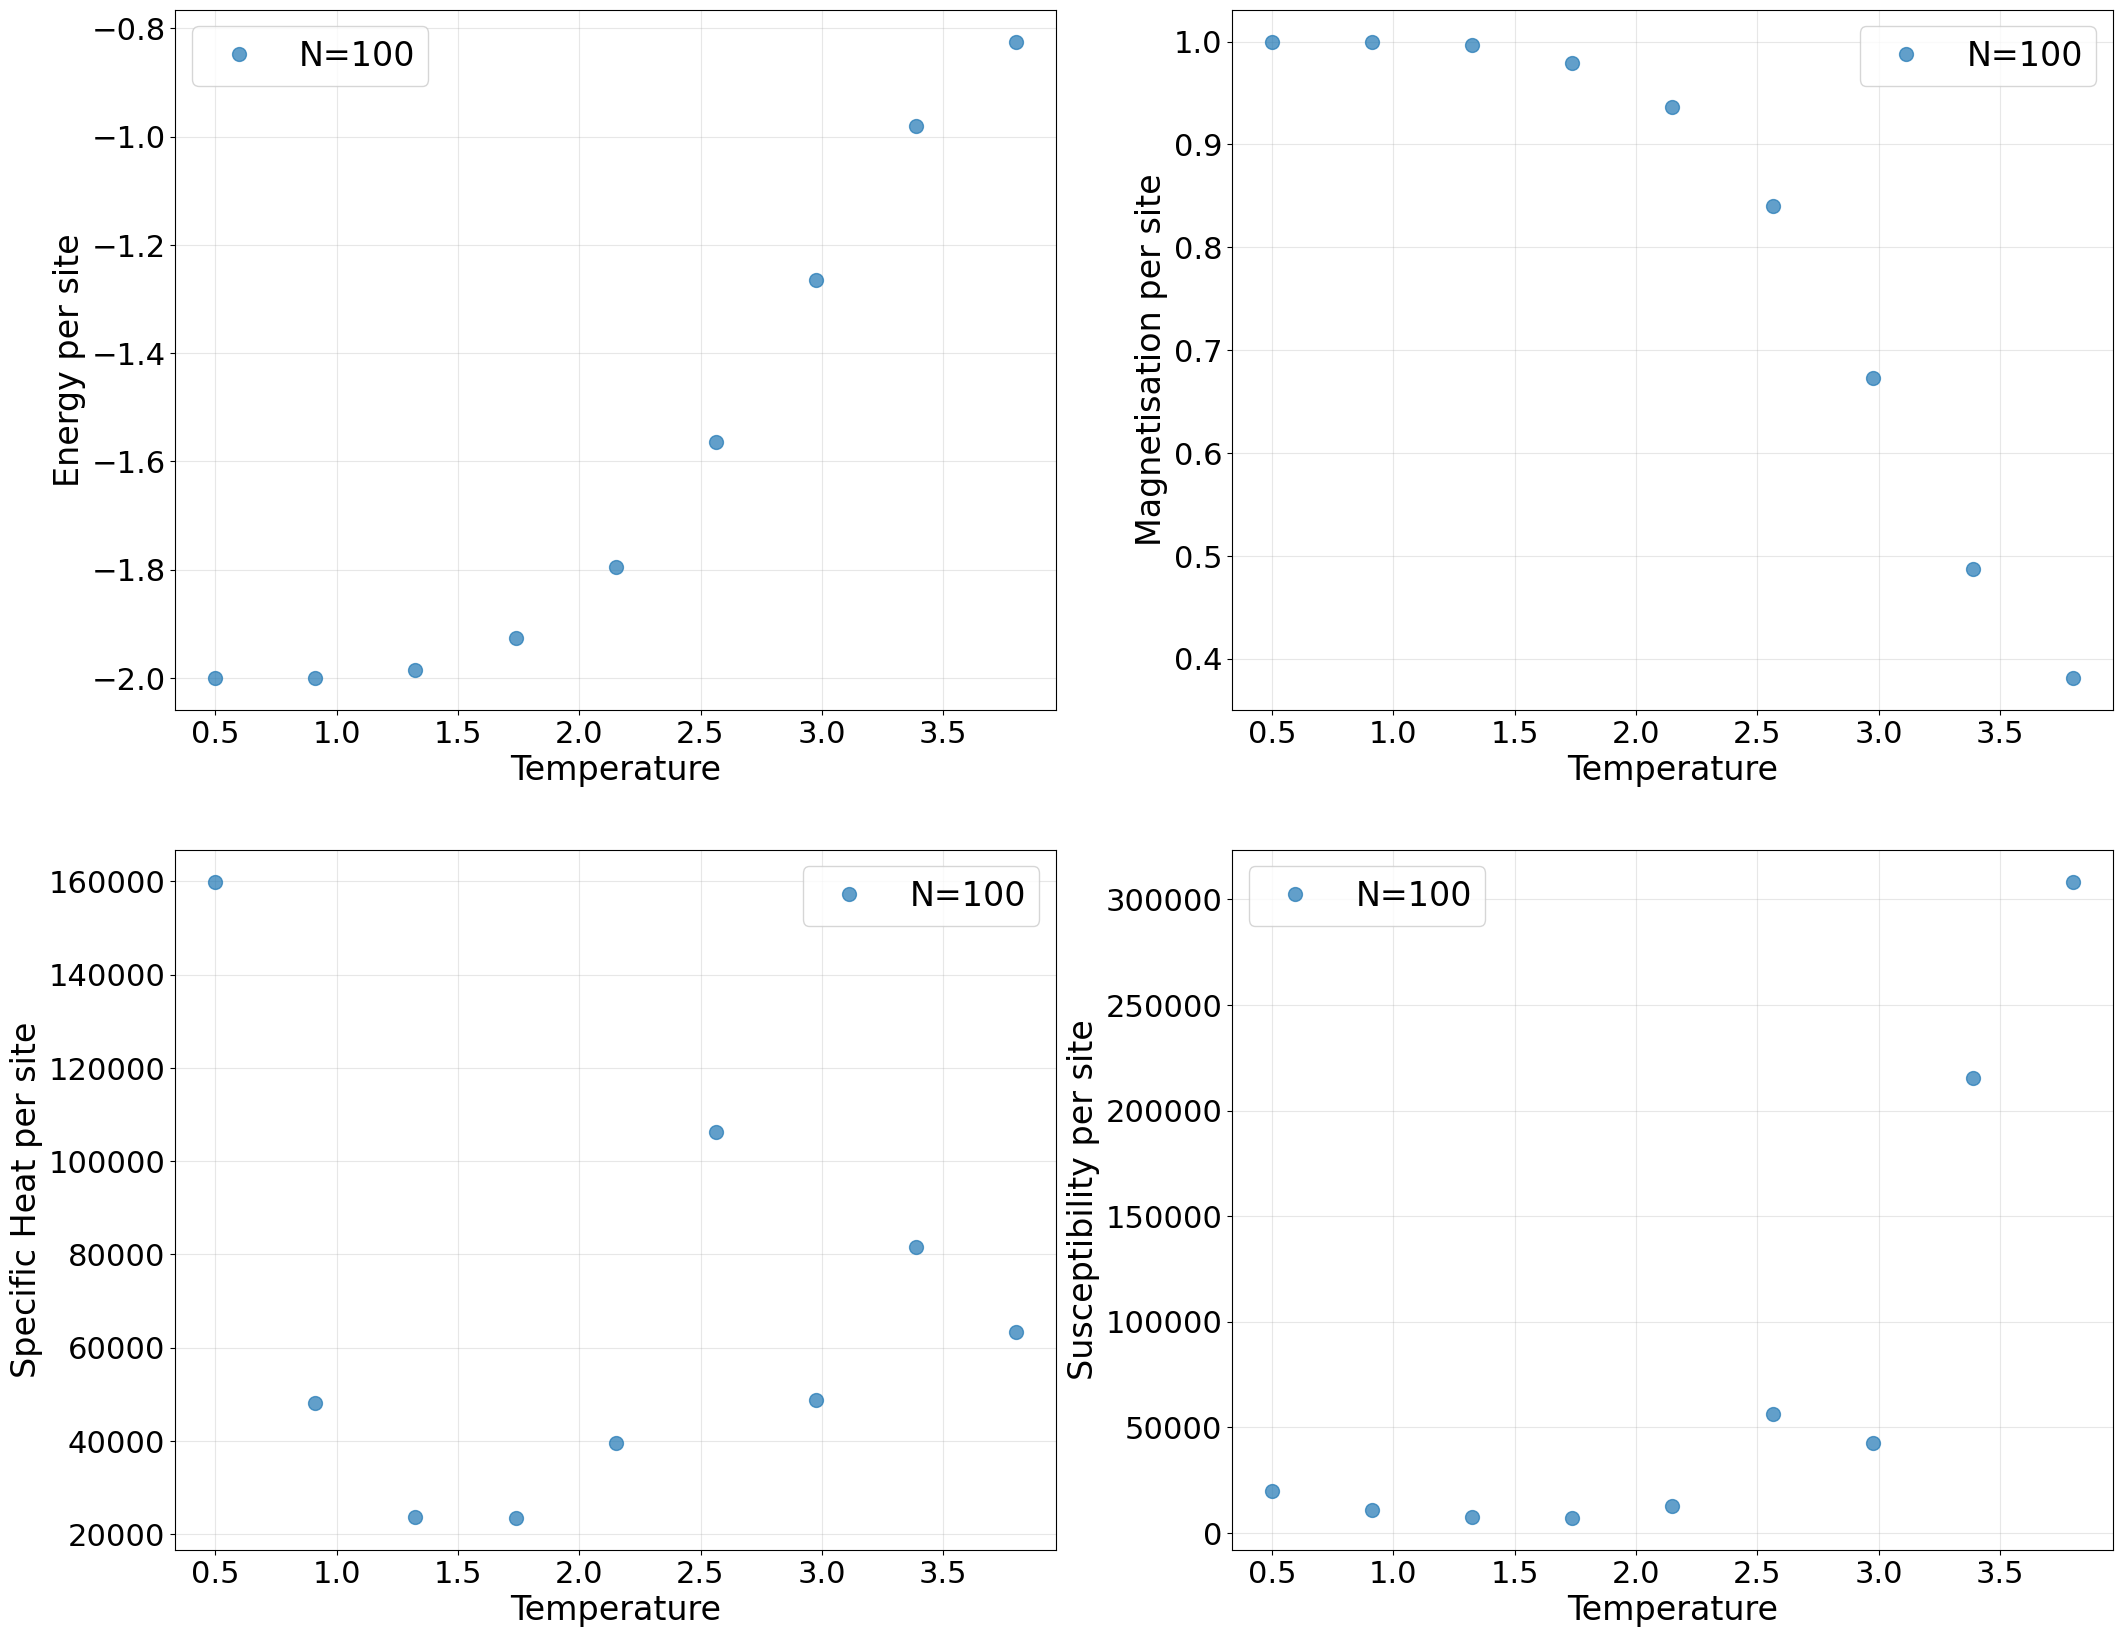

In [24]:
data = np.loadtxt("finite_size_analysis_20.txt")

def plot_values (E,M,C,Chi,L_val):
    titles = ['Energy per site','Magnetisation per site','Specific Heat per site','Susceptibility per site']
    #labels = ['e', 'm', 'c', 'chi']
    physical_quantities = [E,np.abs(M),C,Chi]
    plt.figure(figsize = (25,20))
    Te = np.linspace(0.5,3.8,9)
    for i in range(len(physical_quantities)):
        ax = plt.subplot(2,2,i+1)
        ax.set_xlabel('Temperature', fontsize=24)
        ax.set_ylabel(titles[i], fontsize=24)
        ax.tick_params(labelsize=22)
        ax.tick_params(labelsize=22)
        ax.grid('--', alpha= 0.3)
        ax.plot(Te, physical_quantities[i], '.',markersize=20, label='N='+str(L_val), alpha=0.7)
        ax.legend(fontsize=24)
    plt.savefig('plot.png')   
    
plot_values(data[:,1],data[:,2],data[:,3],data[:,4], 100)

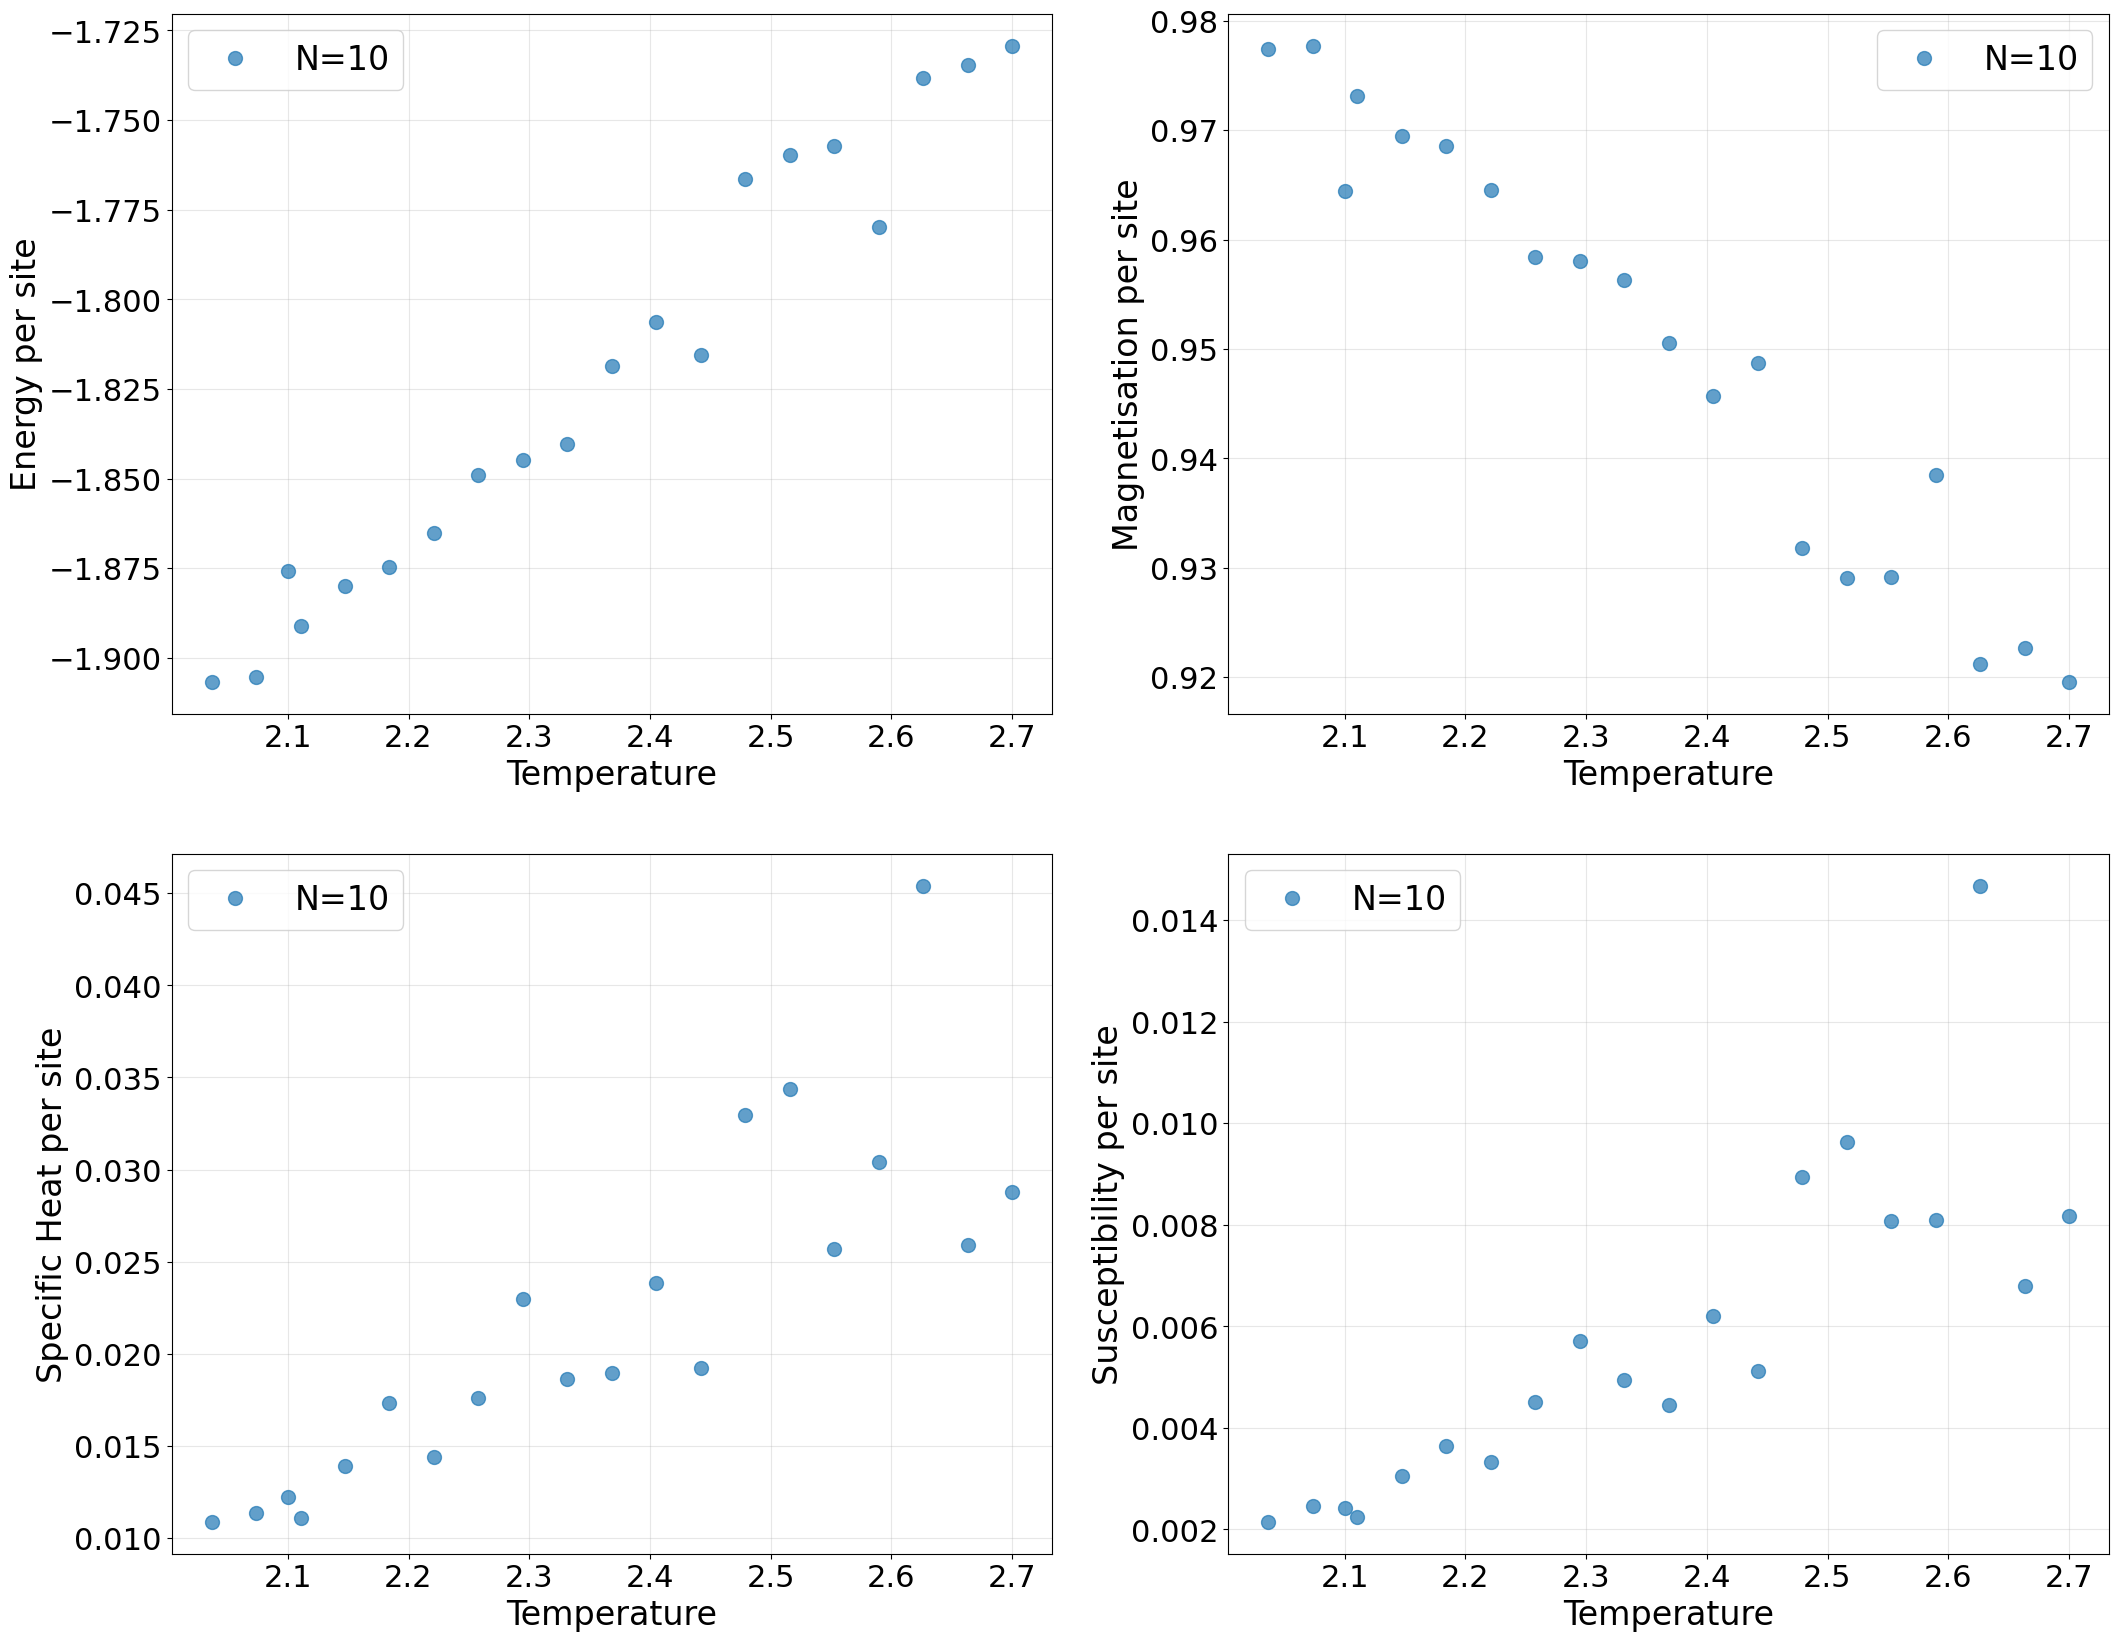

In [44]:
data = np.loadtxt("finite_size_analysis_10.txt")

def plot_values (E,M,C,Chi,L_val):
    titles = ['Energy per site','Magnetisation per site','Specific Heat per site','Susceptibility per site']
    #labels = ['e', 'm', 'c', 'chi']
    physical_quantities = [E,np.abs(M),C,Chi]
    plt.figure(figsize = (25,20))
    Te = data[:,0]
    for i in range(len(physical_quantities)):
        ax = plt.subplot(2,2,i+1)
        ax.set_xlabel('Temperature', fontsize=24)
        ax.set_ylabel(titles[i], fontsize=24)
        ax.tick_params(labelsize=22)
        ax.tick_params(labelsize=22)
        ax.grid('--', alpha= 0.3)
        ax.plot(Te, physical_quantities[i], '.',markersize=20, label='N='+str(L_val), alpha=0.7)
        ax.legend(fontsize=24)
    plt.savefig('plot.png')   
    
plot_values(data[:,1],data[:,3],data[:,5],data[:,7], 10)

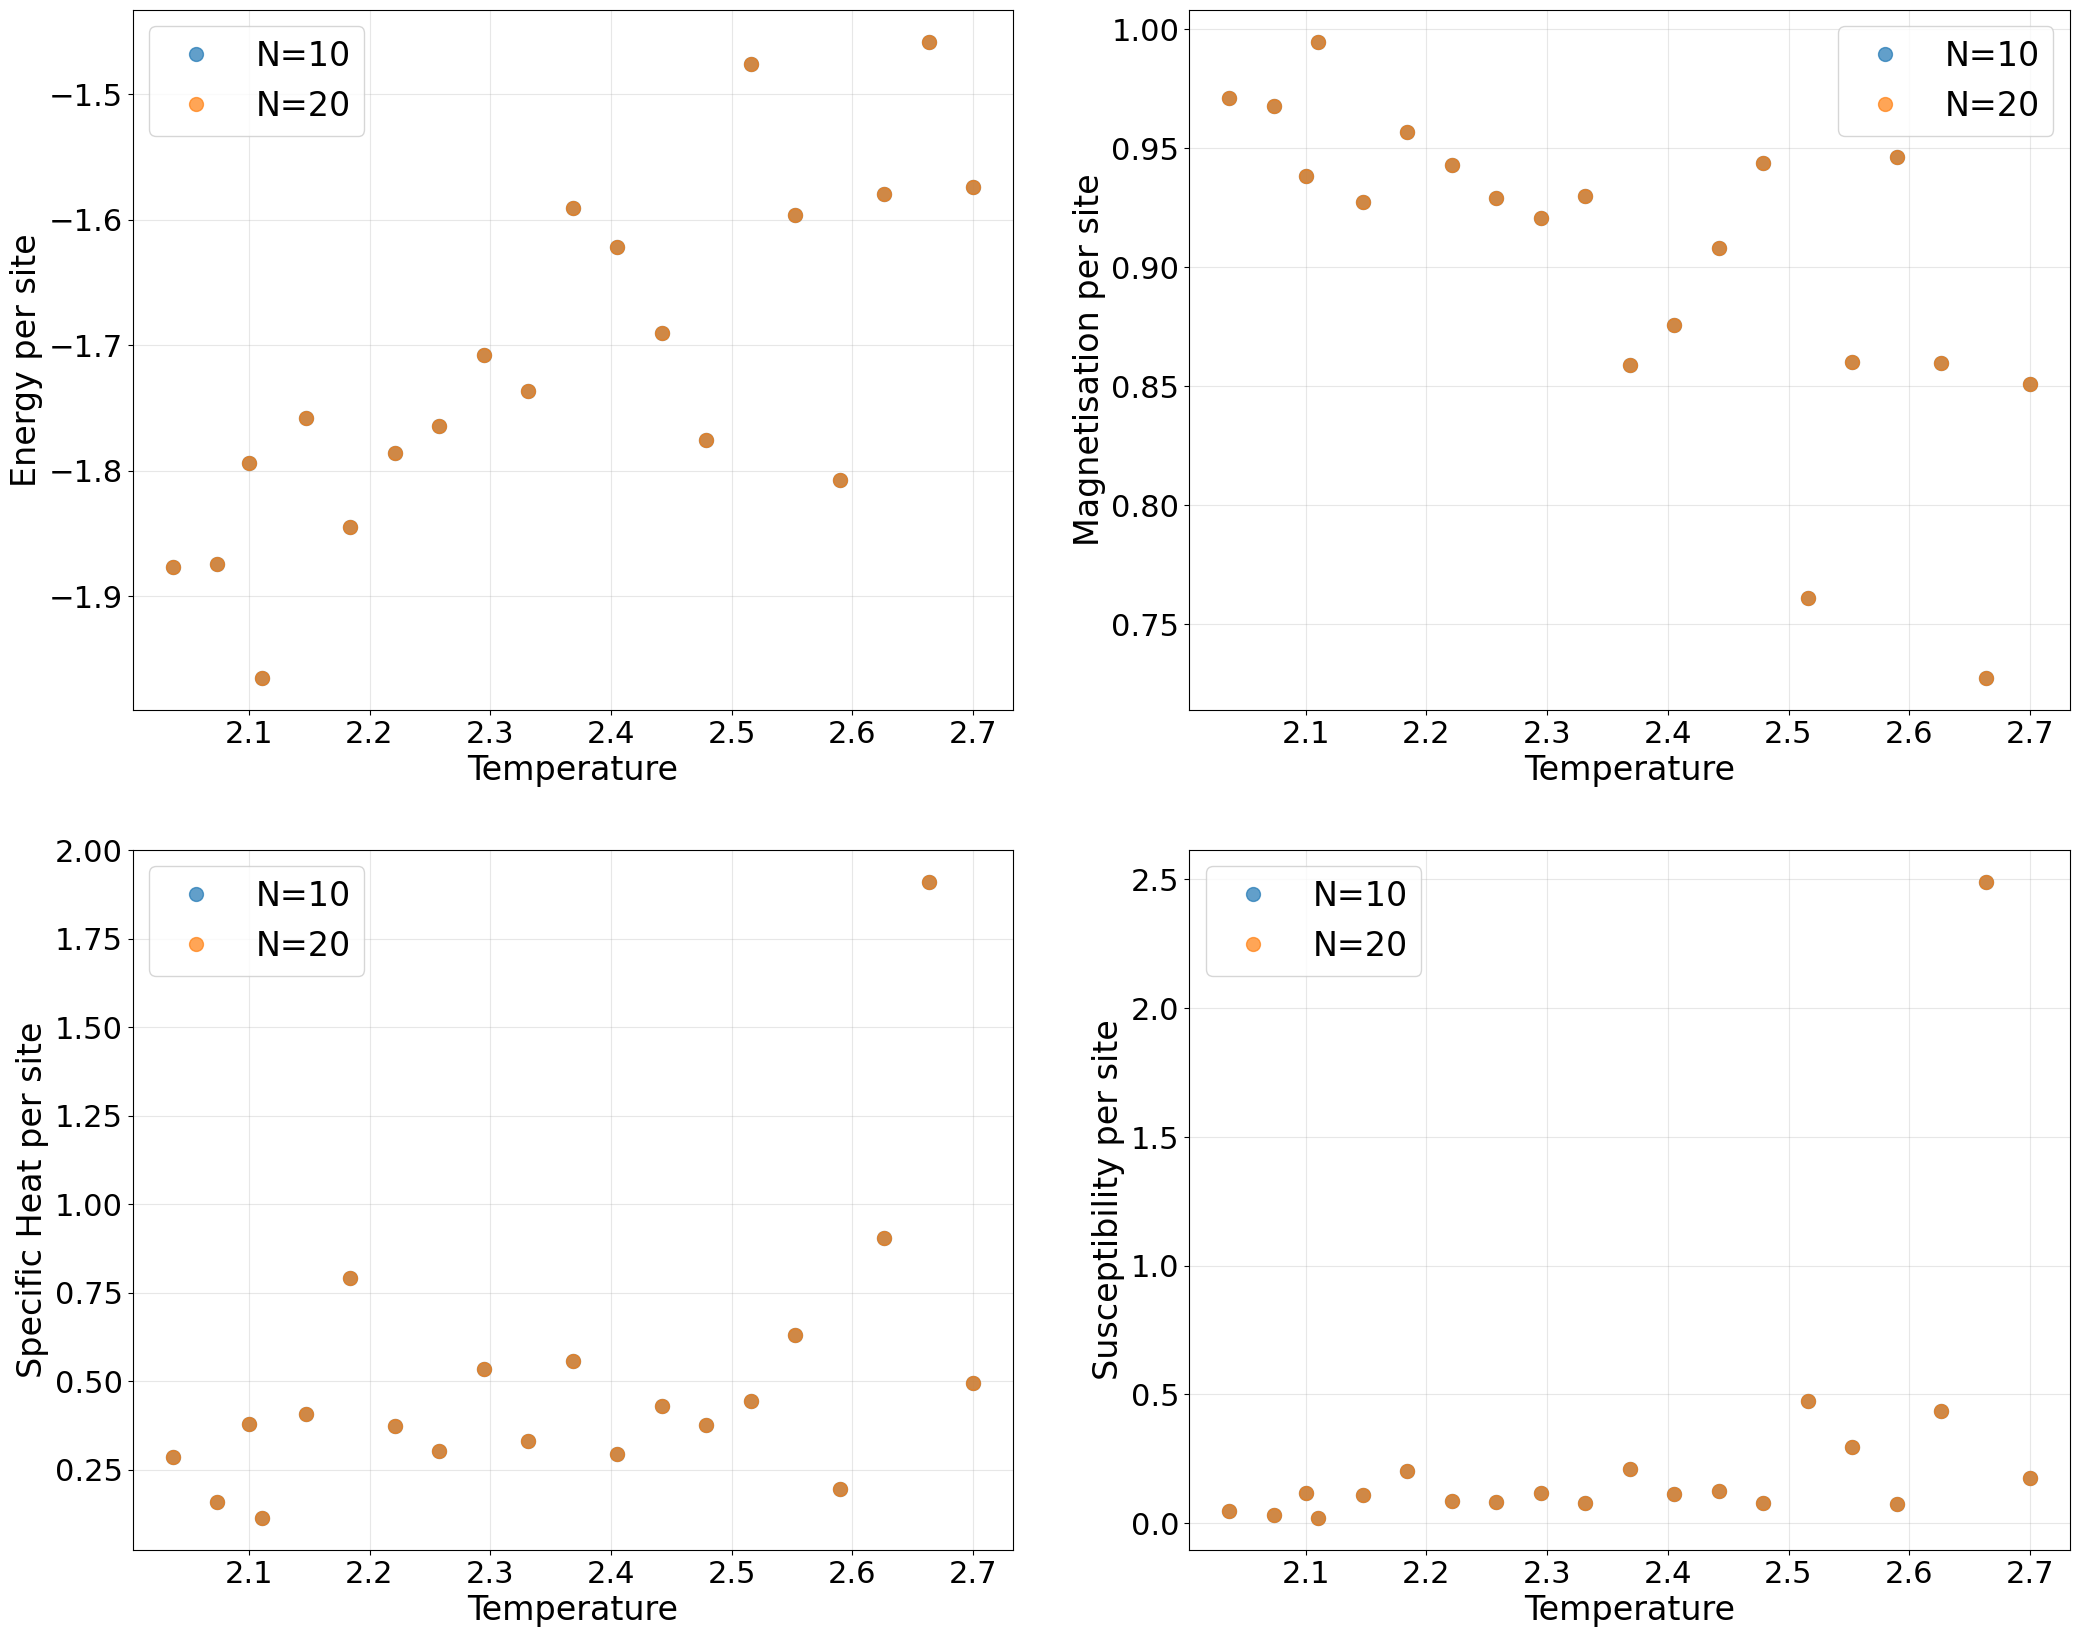

In [27]:
data10 = np.loadtxt("finite_size_analysis_10.txt")
data20 = np.loadtxt("finite_size_analysis_20.txt")
#data40 = np.loadtxt("finite_size_analysis_40.txt")
#data50 = np.loadtxt("finite_size_analysis_50.txt")
#data80 = np.loadtxt("finite_size_analysis_80.txt")

data = np.array([data10, data20])#, data30, data50, data80])
L_val = np.array([10,20])#,40,50,80])
titles = ['Energy per site','Magnetisation per site','Specific Heat per site','Susceptibility per site']
plt.figure(figsize = (25,20))

for l in range (L_val.shape[0]):
    data_current = data[l]
    Te = data10[:,0]
    E = data10[:,1]
    M = data10[:,3]
    C = data10[:,5]
    Chi = data10[:,7]
    physical_quantities = [E,np.abs(M),C,Chi]

    for i in range(len(physical_quantities)):
            ax = plt.subplot(2,2,i+1)
            ax.set_xlabel('Temperature', fontsize=24)
            ax.set_ylabel(titles[i], fontsize=24)
            ax.tick_params(labelsize=22)
            ax.tick_params(labelsize=22)
            ax.grid('--', alpha= 0.3)
            ax.plot(Te, physical_quantities[i], '.',markersize=20, label='N='+str(L_val[l]), alpha=0.7)
            ax.legend(fontsize=24)
    plt.savefig('plot_tot.png')   

        

##### Critical temperature and $\nu$ exponent

- Find the maxinum of $\chi$ for each dimension $L$; 
- the peak of $\chi$ should, in fact, be located at the temperature $T_c(L);$
- Performe an exponential fit in order to find$T_c(\infty)$ and the exponent $\nu$ from the following relation ${:}$

$$
T_c(L)=T_c(\infty)+cL^{-1/\nu}
$$


In [ ]:
Te = np.linspace(2.,2.8,20)
T_c = 2/np.log(1+np.sqrt(2))
L_tot = np.array([10,20,40,50,80])
nl = L_tot.shape[0]

Chi = np.array([data10[:,7],data20[:,7],data40[:,7],data50[:,7],data80[:,7]])
Chi_errors = np.array([data10[:,8],data20[:,8],data40[:,8],data50[:,8],data80[:,8]])


Chi_max = np.zeros((nl,))
T_max = np.zeros((nl,))

for i in range(nl):
    imax = np.argmax(Chi[i,:])            
    Chi_max[i] = Chi[i,imax]
    T_max[i] = Te[imax]


def Tc_fit(n,Tc_est,c,x):
    T_max = Tc_est+c*n**x
    return T_max

L_inv = np.array([1/L for L in L_tot])
guess = [0.45,0.2,1]
par, cov = curve_fit(Tc_fit,L_inv,T_max,guess,maxfev=int(1e6)) 
Tc_est = par[0]
nu = par[2]**(-1)
print('Estimated critical temperature = {0:1.3f}\n'.format(Tc_est))
print('Estimated exponent nu = {0:1.3f}\n'.format(nu))

fig, ax = plt.subplots(figsize=(9,7))
ax.plot(L_inv, T_max, 'o',markersize=7, color="navy", label="$T_{c}(L)$")
ax.plot(L_inv, Tc_fit(L_inv,par[0],par[1],par[2]), '--', label="fit")
ax.set_xlabel("$L^{-1}$", fontsize=15)
ax.set_ylabel("Temperature",fontsize=15)
ax.legend(loc="best",fontsize=13)
